In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_central_diff(x, h): 
        x = np.array(x)
        return (x[2:] - x[:-2]) / (2*h)

In [3]:
def my_forward_diff(x, h): 
    x = np.array(x)
    return (x[1:] - x[:-1]) / h

In [4]:
def my_num_diff_w_smoothing(x, y, n):
    y_smooth = [np.mean(y[i-n:i+n]) for i in range(n, len(x)-n)]
    h = 2 * np.pi / 99
    dy = my_central_diff(y_smooth, h)
    return dy, x[n+1:-n-1]

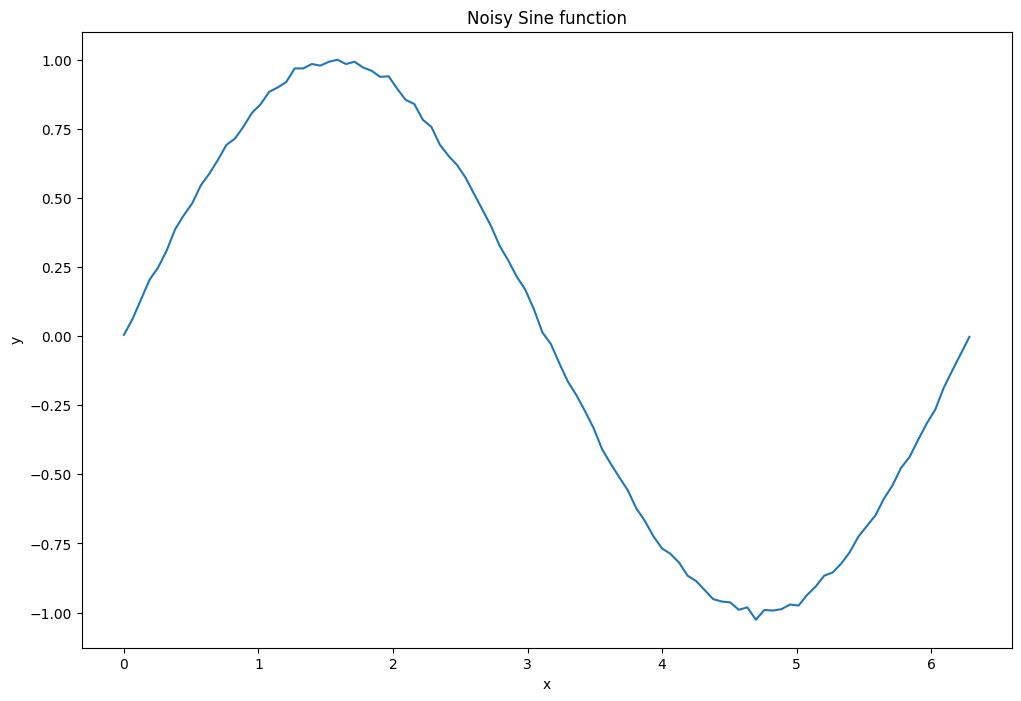

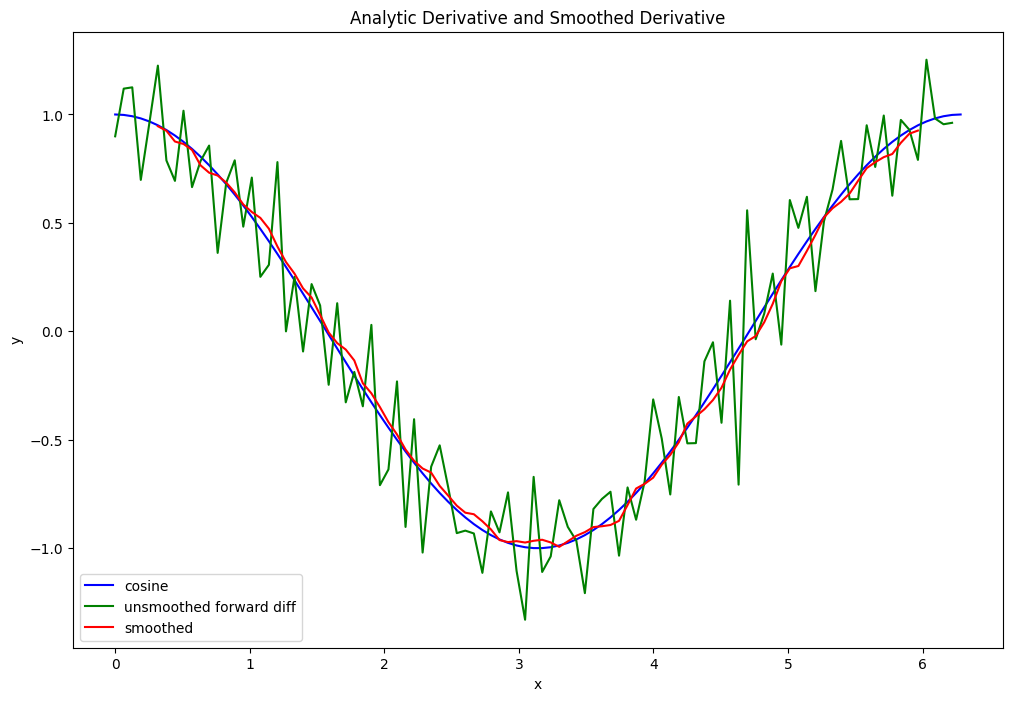

In [5]:
x = np.linspace(0, 2*np.pi, 100)
np.random.seed(42)
y = np.sin(x) + np.random.randn(len(x))/100

[dy, X] = my_num_diff_w_smoothing(x, y, 4)

h=2*np.pi/99

exact_solution = np.cos(x)
forward_diff = my_forward_diff(y,h)

# Plot Sine Function
plt.figure(figsize = (12, 8))
plt.xlabel('x')  
plt.ylabel('y') 

# displaying the title 
plt.title("Noisy Sine function") 

plt.plot(x, y)

# Plot solution
plt.figure(figsize = (12, 8))
plt.xlabel('x')  
plt.ylabel('y')  
# displaying the title 
plt.title("Analytic Derivative and Smoothed Derivative") 
plt.plot(x, exact_solution, label = "cosine", color='blue')
plt.plot(x[:-1], forward_diff, label = "unsmoothed forward diff", color='green')
plt.plot(X, dy, label = "smoothed", color='red')


plt.legend()
plt.show()